### Imports

In [1]:
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt
from main import run_main
import warnings
warnings.filterwarnings('ignore')

### Configuraciones

In [2]:
PERCEPTRON_TYPES = ["LINEAR", "HIPERBOLIC", "LOGISTIC"]

In [3]:
config = {
    "perceptron_type": "LOGISTIC",
    "learning_rate": 0.01,
    "training_percentage": 0.8,
    "max_epochs": 5000,
    "bias": 1,
    "beta": 1,
    "epsilon": 0.01
}

### Set de gráficos 1

Primero, analizar que pasa variando el learning_rate (0.01, 0.001, 0.0001) para los diferentes tipos de perceptrones.

Para ello, graficamos el error en función de la cantidad de épocas para cada configuración.


In [31]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for learning_rate in [0.0001, 0.001, 0.01]: # Con 0.5 para arriba hay overflow
        configCopy["learning_rate"] = learning_rate
       
        for run in range(1, repeats+1):
            epoch, mse, test_errors = run_main(configCopy)

            for i in range(epoch):
                result_list.append({
                    "perceptron_type": perceptron_type,
                    "learning_rate": learning_rate,
                    "mse": mse[i],
                    "epoch": i+1,
                })

df = pd.DataFrame(result_list)
# df.to_csv('set1.csv', index=False)

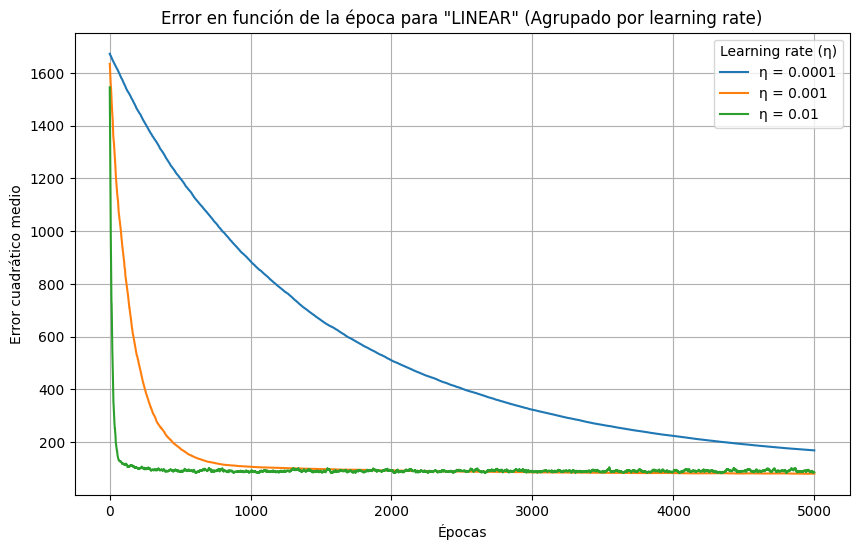

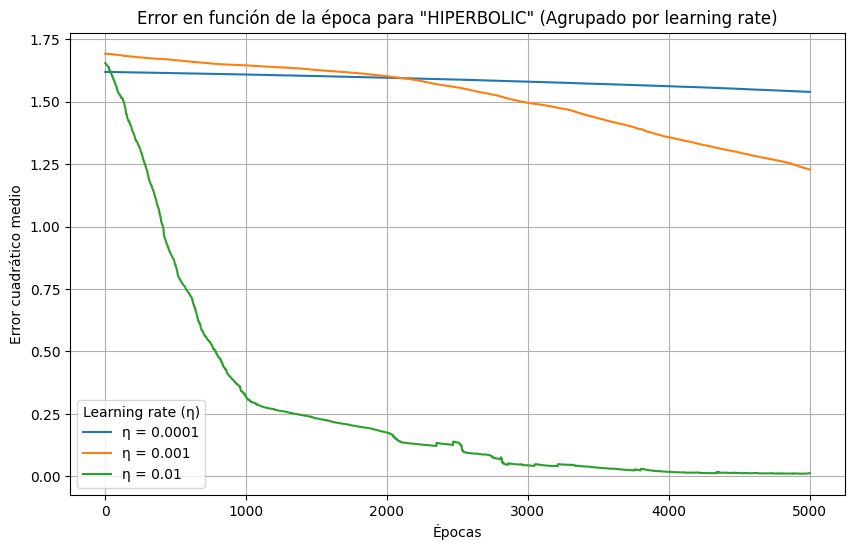

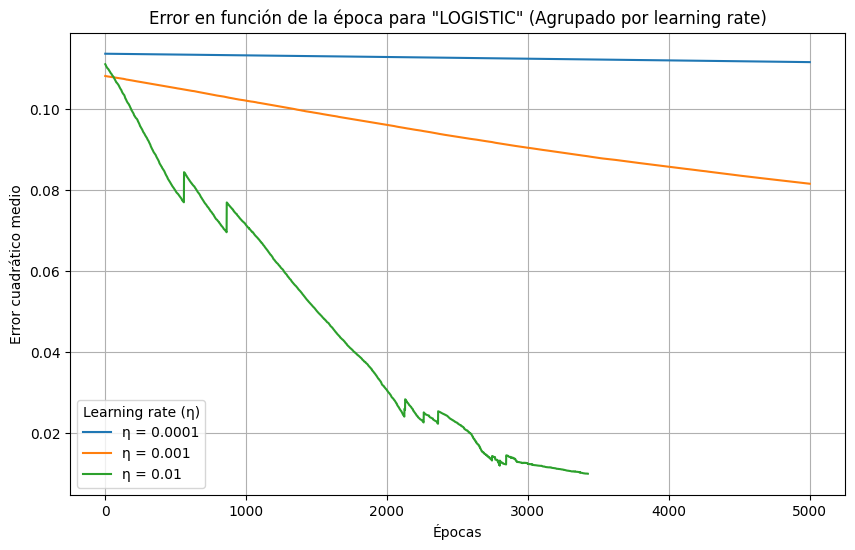

In [32]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df[df["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    for learning_rate in subset["learning_rate"].unique():
        lr_subset = subset[subset["learning_rate"] == learning_rate]
        mean_lr_subset = lr_subset.groupby("epoch")["mse"].mean()
        plt.plot(mean_lr_subset.index, mean_lr_subset, label="η = " + str(learning_rate))

    # plt.yticks(range(0, 4000, 500))
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}" (Agrupado por learning rate)')
    plt.legend(title='Learning rate (η)')


    plt.grid(True)
    plt.show()

### Set de gráficos 2

Luego, analizar que pasa variando el training_percentage (0.3, 0.5, 0.7, 0.9) para los diferentes tipos de perceptrones. Y de esta forma encontrar la mejor configuración para optimizar la capacidad de generalización del modelo.

Para ello, graficamos el error en función de la cantidad de épocas para cada configuración.

In [33]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for tp in [0.3, 0.5, 0.7, 0.9]:
        configCopy["training_percentage"] = tp

        for run in range(1, repeats+1):
            epoch, mse, test_errors = run_main(configCopy)

            for i in range(epoch):
                result_list.append({
                    "perceptron_type": perceptron_type,
                    "training_percentage": tp,
                    "mse": mse[i],
                    "epoch": i+1,
                })
            
df2 = pd.DataFrame(result_list)
# df2.to_csv('set2.csv', index=False)

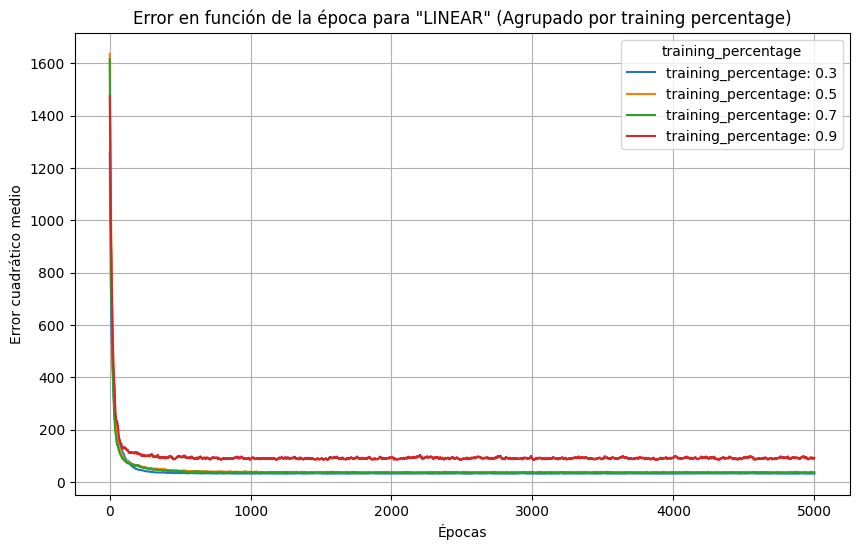

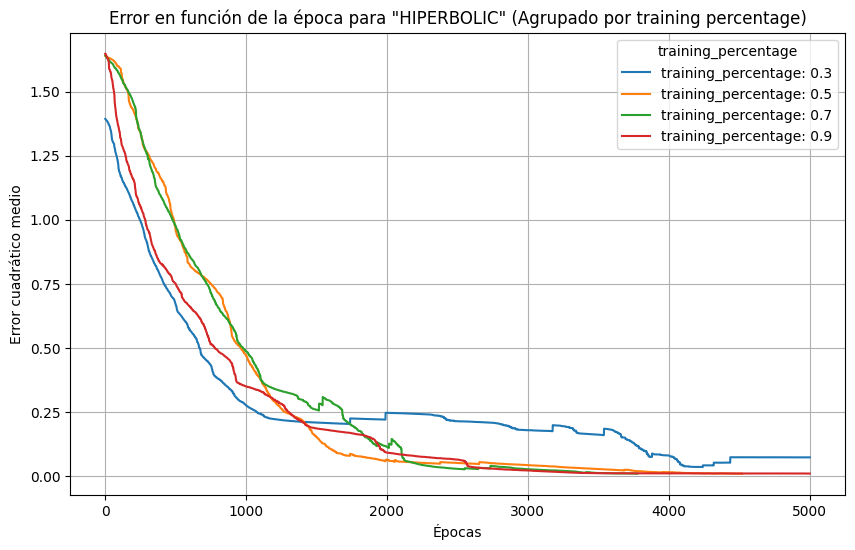

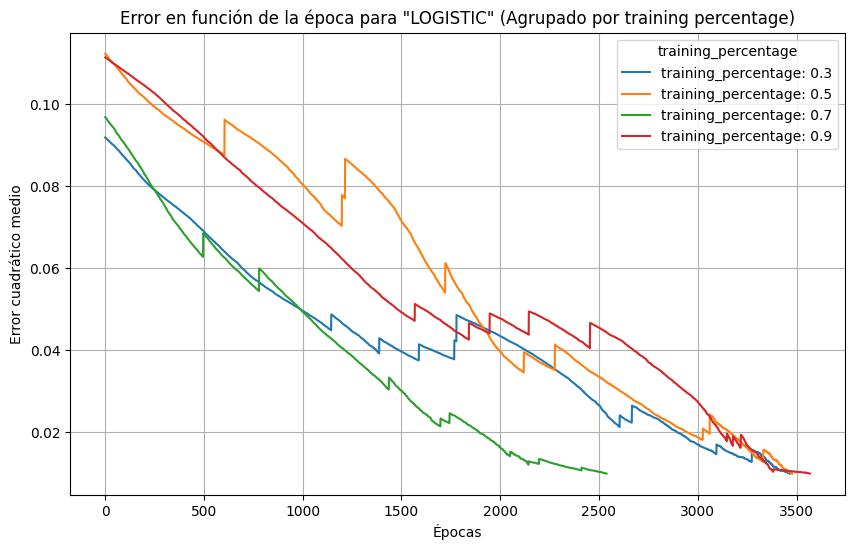

In [34]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df2[df2["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    for tp in subset["training_percentage"].unique():
        tp_subset = subset[subset["training_percentage"] == tp]
        mean_tp_subset = tp_subset.groupby("epoch")["mse"].mean()
        plt.plot(mean_tp_subset.index, mean_tp_subset, label="training_percentage: " + str(tp))

    # plt.yticks(range(0, 4000, 500))
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}" (Agrupado por training percentage)')
    plt.legend(title='training_percentage')


    plt.grid(True)
    plt.show()

### Set de gráficos 3

Por último, terminaremos de analizar los diferentes tipos de percertrones variando el parametro beta.

Para ello, graficamos el error en función de la cantidad de épocas para cada configuración.

In [4]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for beta in [0.25, 0.5, 0.75, 1]:
        configCopy["beta"] = beta

        for run in range(1, repeats+1):
            epoch, mse, test_errors = run_main(configCopy)

            for i in range(epoch):
                result_list.append({
                    "perceptron_type": perceptron_type,
                    "beta": beta,
                    "mse": mse[i],
                    "epoch": i+1,
                })
            
df3 = pd.DataFrame(result_list)

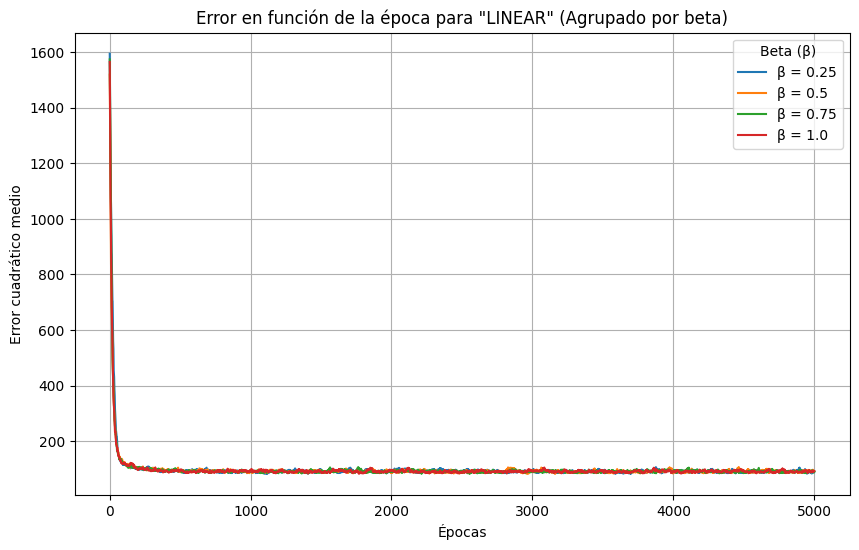

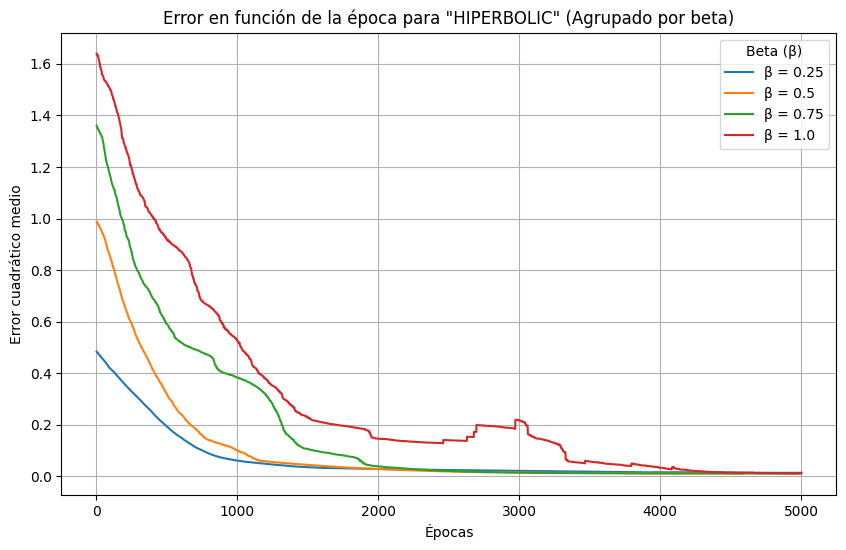

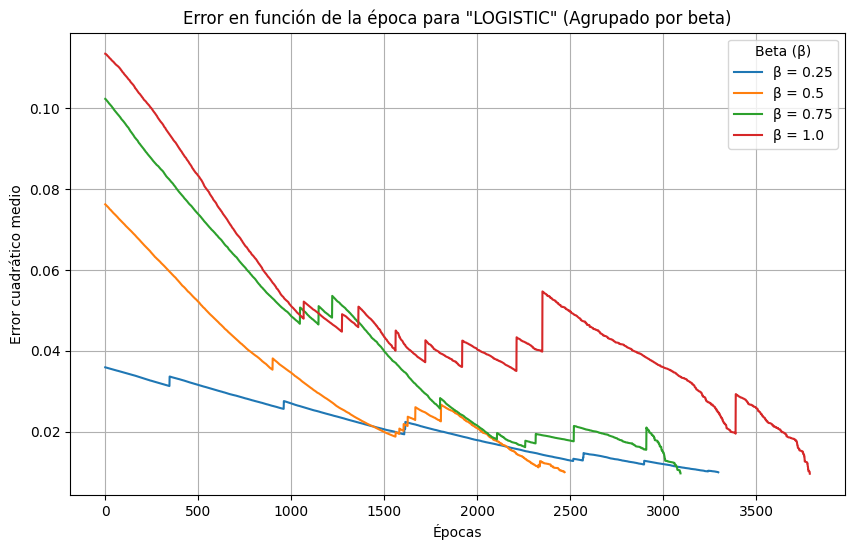

In [5]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df3[df3["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    for beta in subset["beta"].unique():
        beta_subset = subset[subset["beta"] == beta]
        mean_beta_subset = beta_subset.groupby("epoch")["mse"].mean()
        plt.plot(mean_beta_subset.index, mean_beta_subset, label="β = " + str(beta))

    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}" (Agrupado por beta)')
    plt.legend(title='Beta (β)')


    plt.grid(True)
    plt.show()

### Set de gráficos 4

Con el objetivo de analizar la capacidad de generalización de los modelos, graficamos el error en función de la cantidad de épocas para cada configuración tanto para el dataset de entrenamiento como para el de testeo.


In [5]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for run in range(1, repeats+1):
        epoch, train_errors, test_errors = run_main(configCopy)

        for i in range(epoch):
            result_list.append({
                "perceptron_type": perceptron_type,
                "train_errors": train_errors[i],
                "test_errors": test_errors[i],
                "epoch": i+1,
            })
            
df4 = pd.DataFrame(result_list)

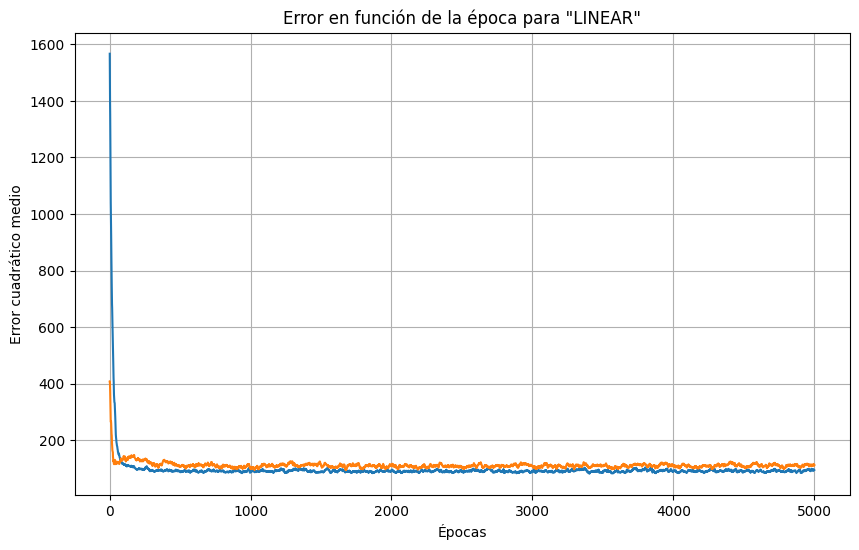

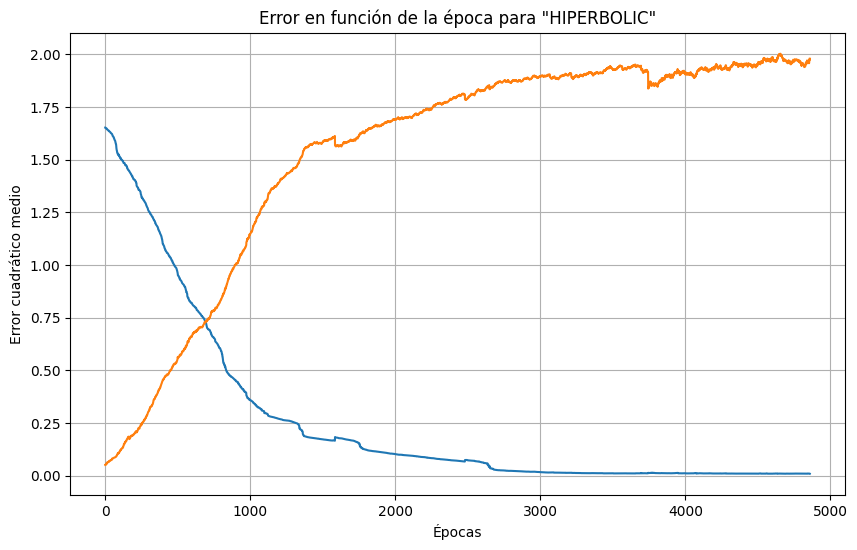

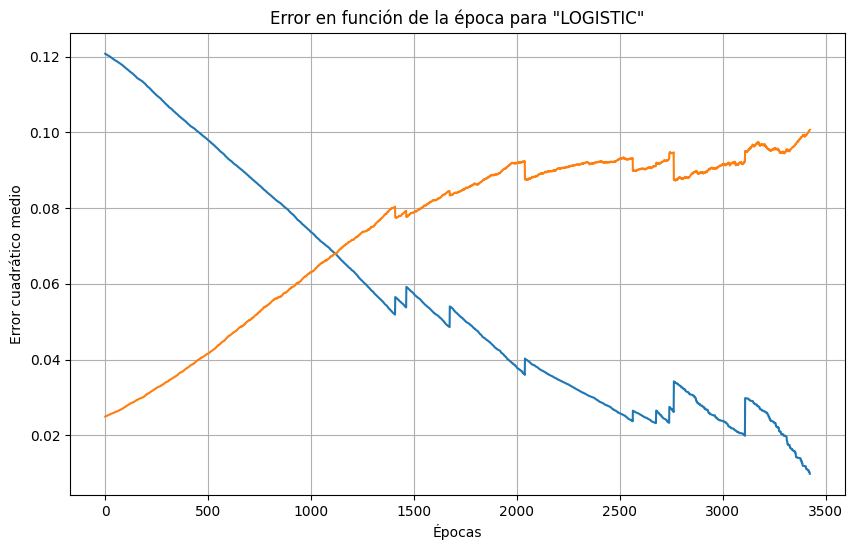

In [6]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df4[df4["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    mean_train_errors = subset.groupby("epoch")["train_errors"].mean()
    mean_test_errors = subset.groupby("epoch")["test_errors"].mean()
    plt.plot(mean_train_errors.index, mean_train_errors, label="Train errors")
    plt.plot(mean_test_errors.index, mean_test_errors, label="Test errors")

    
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}"')
    plt.legend(title='Tipo de error')

    plt.grid(True)
    plt.show()